# Payroll Data for the City of New York

## This is a dataset hosted by the City of New York. 

**Contents:**

1. [Pay over the years - Distribution](#years_distro)
2. [Basis of Pay - Anuual, Daily, Hourly](#pay_basis)
3. [Highest & the Lowest Paying Agencies - Annually, Daily & Hourly](#agcy_high_low)
4. [Highest & the Lowest Paying Job Titles - Annually, Daily & Hourly](#title_high_low)
5. [Pay by Location](#loc_pay)
6. [Overtime Compensation](#overtime)

Let us deep dive into it by gathering some necessary library imports & take a sneak peak into the data!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns

%matplotlib inline

# Payroll Information

Four (4) columns correspond to the actual $payroll information namely -
1. Base Salary
2. Regular Gross Pay (Base Salary + Allowances)
3. Over Time Pay (Total OT Paid)

In [2]:
data = pd.read_csv("./assets/citywide-payroll-data-fiscal-year.csv")
data.sample(10)

/tmp/ipykernel_11468/3317408950.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./assets/citywide-payroll-data-fiscal-year.csv")


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
388548,2014,465.0,COMMUNITY COLLEGE (KINGSBORO),JONES,KHAMATTIE,NaN,2014-03-01T00:00:00.000,NaN,ADJUNCT LECTURER,SEASONAL,125.05,per Day,70.00,8753.43,0.0,0.00,0.00
2540420,2017,NaN,DEPT OF ED PER SESSION TEACHER,BECKER-DAYTON,ELYSE,NaN,2016-09-06T00:00:00.000,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Day,0.00,366.22,0.0,0.00,0.00
3857099,2015,NaN,POLICE DEPARTMENT,CABRERA,RAMON,NaN,1998-12-20T00:00:00.000,BROOKLYN,SCHOOL SAFETY AGENT,ACTIVE,37906.00,per Annum,2085.72,37752.20,448.5,13859.98,7091.78
1034025,2015,NaN,DEPT OF ED HRLY SUPPORT STAFF,BISCHOFF,PATRICIA,NaN,2008-02-08T00:00:00.000,MANHATTAN,F/T SCHOOL LUNCH HELPER,CEASED,14.78,per Hour,0.00,8927.05,0.0,0.00,940.07
3048714,2016,NaN,DISTRICT ATTORNEY KINGS COUNTY,BEAL,COURTNEY,L,2015-09-28T00:00:00.000,BROOKLYN,ASSISTANT DISTRICT ATTORNEY,ACTIVE,60000.00,per Annum,1390.00,43458.98,0.0,0.00,0.00
3363814,2020,996.0,NYC HOUSING AUTHORITY,RUSSELL,BRENDAN,NaN,2009-06-29T00:00:00.000,MANHATTAN,CARPENTER,ACTIVE,364.14,per Day,1820.00,94595.83,284.5,21589.14,4226.01
1387199,2020,742.0,DEPT OF ED PEDAGOGICAL,GONZALEZ,EMINESSE,NaN,2010-06-17T00:00:00.000,MANHATTAN,TEACHER SPECIAL EDUCATION,ACTIVE,78989.00,per Annum,0.00,74388.51,0.0,0.00,17043.44
1459092,2019,742.0,DEPT OF ED PEDAGOGICAL,BULLA,RACHAEL,R,2000-09-05T00:00:00.000,MANHATTAN,TEACHER,ACTIVE,105469.00,per Annum,0.00,115082.30,0.0,0.00,0.00
597232,2015,NaN,DEPARTMENT OF CORRECTION,MASSEY-COVINGTO,DARLENE,E,2004-03-04T00:00:00.000,BROOKLYN,CAPTAIN,ACTIVE,101044.00,per Annum,2085.72,101769.50,272.5,21629.34,16877.62
2925632,2020,846.0,DEPT OF PARKS & RECREATION,ANDERSON,KIORA,J,2019-02-20T00:00:00.000,BROOKLYN,JOB TRAINING PARTICIPANT,CEASED,15.45,per Hour,159.00,2385.00,0.0,0.00,0.00


To keep things simple, I create another column `Total Pay` which is simply the sum of Over Time & Regular Pay.

In [3]:
data = data.drop(['Last Name','First Name'], axis=1)
data['Total Pay'] = data['Regular Gross Paid'] + data['Total OT Paid']

<a id='years_distro'></a>
# Starting things simple!

Let's visualize how the **total pay** has fared over the **years** in the form of a distribution plot.

/home/hussein-ali/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/hussein-ali/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/hussein-ali/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/hussein-ali/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seabo

<Figure size 800x500 with 0 Axes>

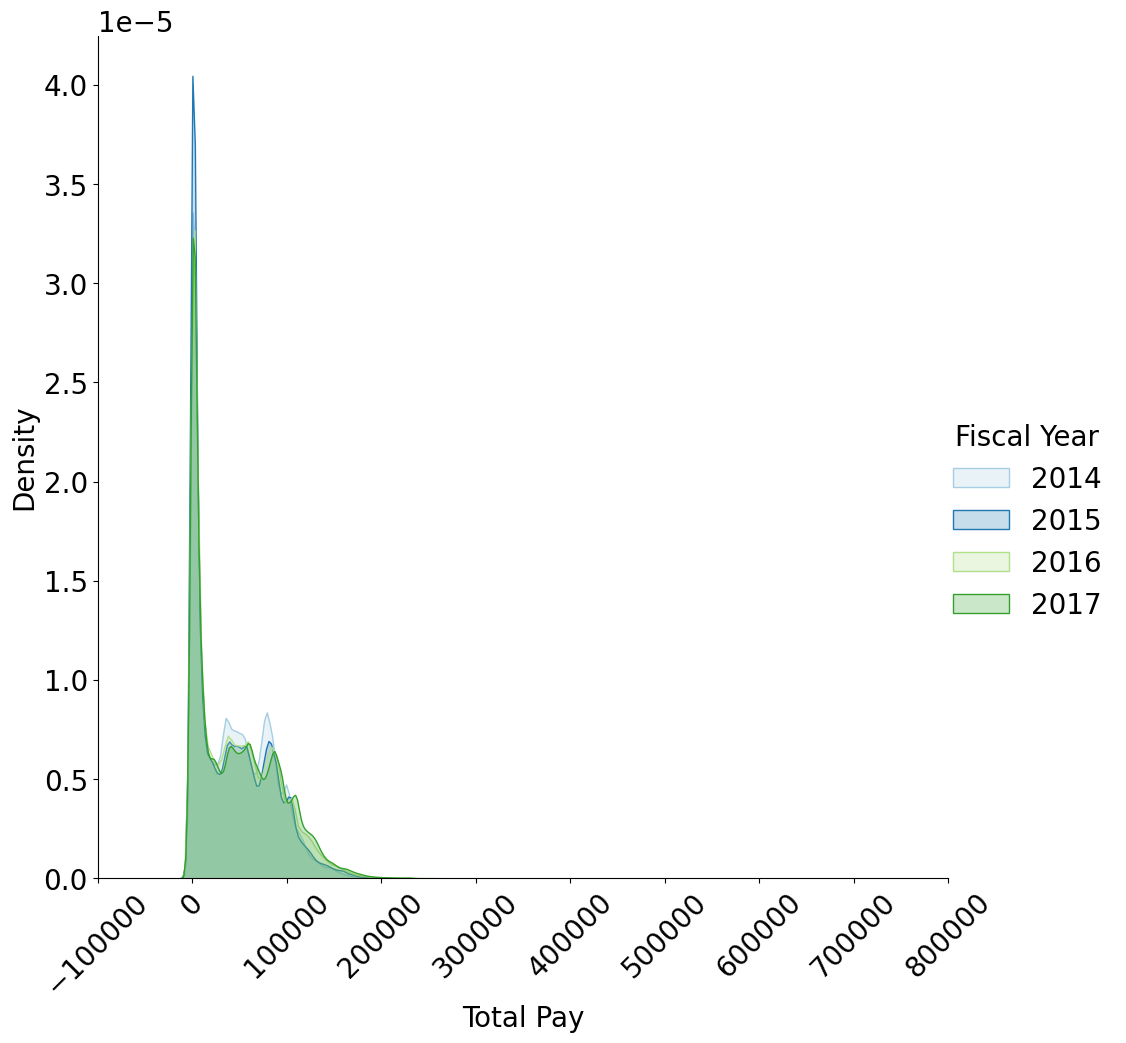

In [4]:
data['Fiscal Year'] = data['Fiscal Year'].astype(str)
plt.figure(figsize=(8, 5))
g = sns.FacetGrid(data, hue='Fiscal Year', height=10, hue_order=['2014', '2015', '2016', '2017'], palette="Paired")
g.map(sns.kdeplot, "Total Pay", shade=True)
g.set_xticklabels(rotation=45)
g.add_legend()
plt.show()

In [5]:
data['Pay Basis'].unique()

array(['per Annum', 'per Hour', 'per Day', 'Prorated Annual'],
      dtype=object)

<a id='pay_basis'></a>
# Pay Basis

Since there is a fair bit of difference in the payroll information based on the basis of pay - 
1. Pay by Annum (Annualy)
2. Pay by the Day
3. Pay by the Hour

So I thought it would be a good idea to segregate this data in order to analyse them differently since there is going to be a significant difference in the thier types of employers as well.

In [6]:
data_per_annum = data[data['Pay Basis'].isin([' per Annum',
                                           ' Prorated Annual',
                                           'per Annum','Prorated Annual'])].drop('Pay Basis',
                                                                                axis=1)
data_per_hour = data[data['Pay Basis'].isin([' per Hour',
                                           'per Hour'])].drop('Pay Basis', axis=1)
data_per_day = data[data['Pay Basis'].isin([' per Day',
                                           'per Day'])].drop('Pay Basis', axis=1)

print ("Per Annum Basis --> ",data_per_annum.shape,
       "\nPer Day Basis -- >", data_per_day.shape,
       "\nPer Hour Basis -- >", data_per_hour.shape)

Per Annum Basis -->  (2364759, 15) 
Per Day Basis -- > (863824, 15) 
Per Hour Basis -- > (694707, 15)


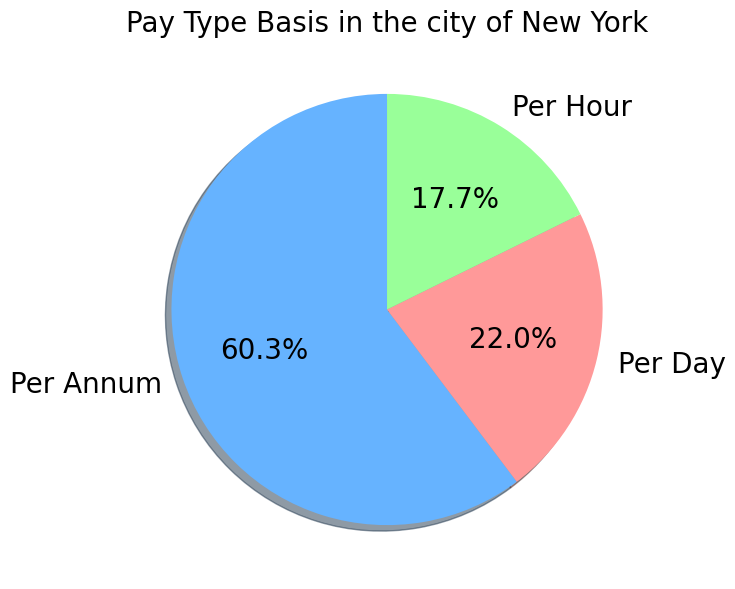

In [7]:
dist_pay_type = [data_per_annum.shape[0], data_per_day.shape[0], data_per_hour.shape[0]]
plt.figure(figsize=(7,7))
plt.pie(dist_pay_type, labels=['Per Annum','Per Day','Per Hour'],
                  autopct='%1.1f%%', shadow=True, startangle=90,
             colors=['#66b3ff','#ff9999','#99ff99'])
plt.title("Pay Type Basis in the city of New York")
plt.show()

In [8]:
def plot_high_low_pay(col, count, pay_basis):
    
    if (pay_basis=='Annum'):
        highest_paying_annum = data_per_annum.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_annum = data_per_annum.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20,25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), data=highest_paying_annum, 
                      orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), data=lowest_paying_annum, 
                      orient='h', ax=ax[1])
        ax[0].set_xlabel("Average Total Pay")
        ax[1].set_xlabel("Average Total Pay")
        plt.show()
    elif (pay_basis == 'Day'):
        highest_paying_day = data_per_day.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_day = data_per_day.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20, 25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=highest_paying_day, orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=lowest_paying_day, orient='h', ax=ax[1])
        ax[0].set_xlabel("Average Total Pay")
        ax[1].set_xlabel("Average Total Pay")
        plt.show()
    elif (pay_basis=='Hour'):
        highest_paying_hour = data_per_hour.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=False).head(count)
        lowest_paying_hour = data_per_hour.groupby(str(col))['Total Pay'].mean().reset_index().sort_values('Total Pay', ascending=True).head(count)

        f, ax = plt.subplots(2,1,figsize=(20, 25))
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=highest_paying_hour, orient='h', ax=ax[0])
        ax1 = sns.barplot(x='Total Pay', y=str(col), 
                          data=lowest_paying_hour, orient='h', ax=ax[1])
        ax[0].set_xlabel("Average Total Pay")
        ax[1].set_xlabel("Average Total Pay")
        plt.show()

<a id='agcy_high_low'></a>
# Highest & the Lowest Paying Agencies 

### Pay by Annum

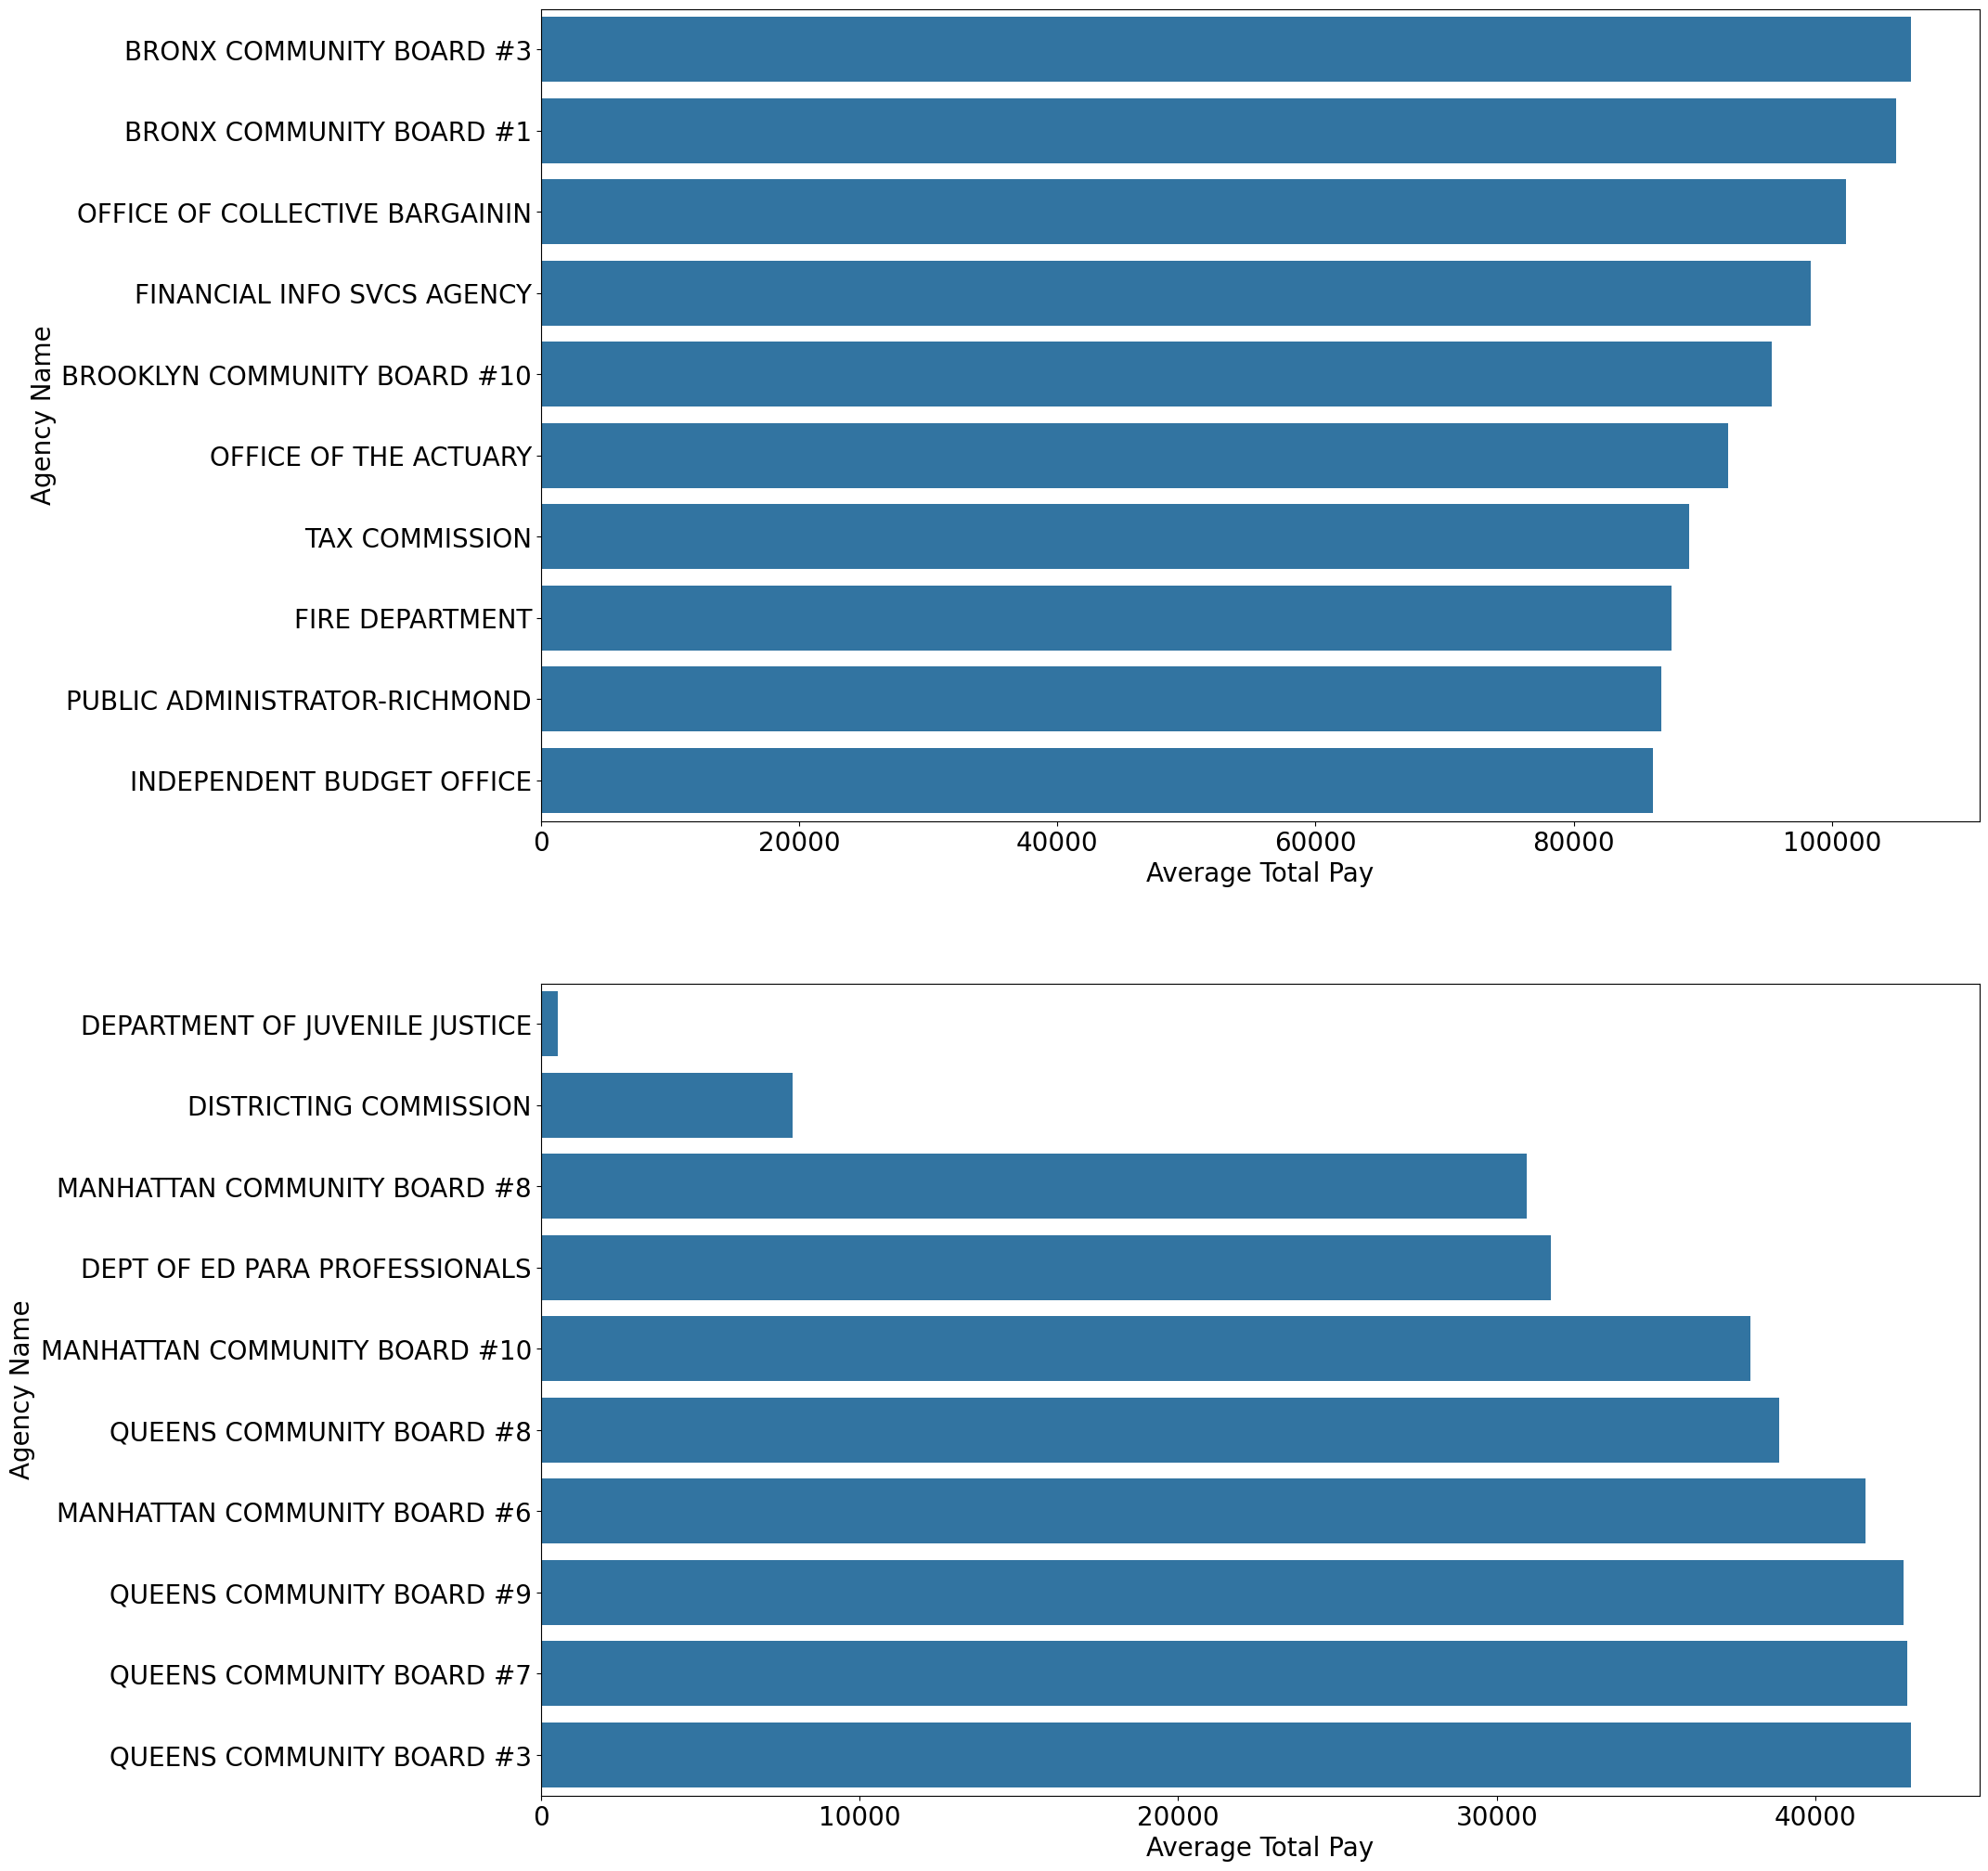

In [9]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Annum')

#### Pay by Day

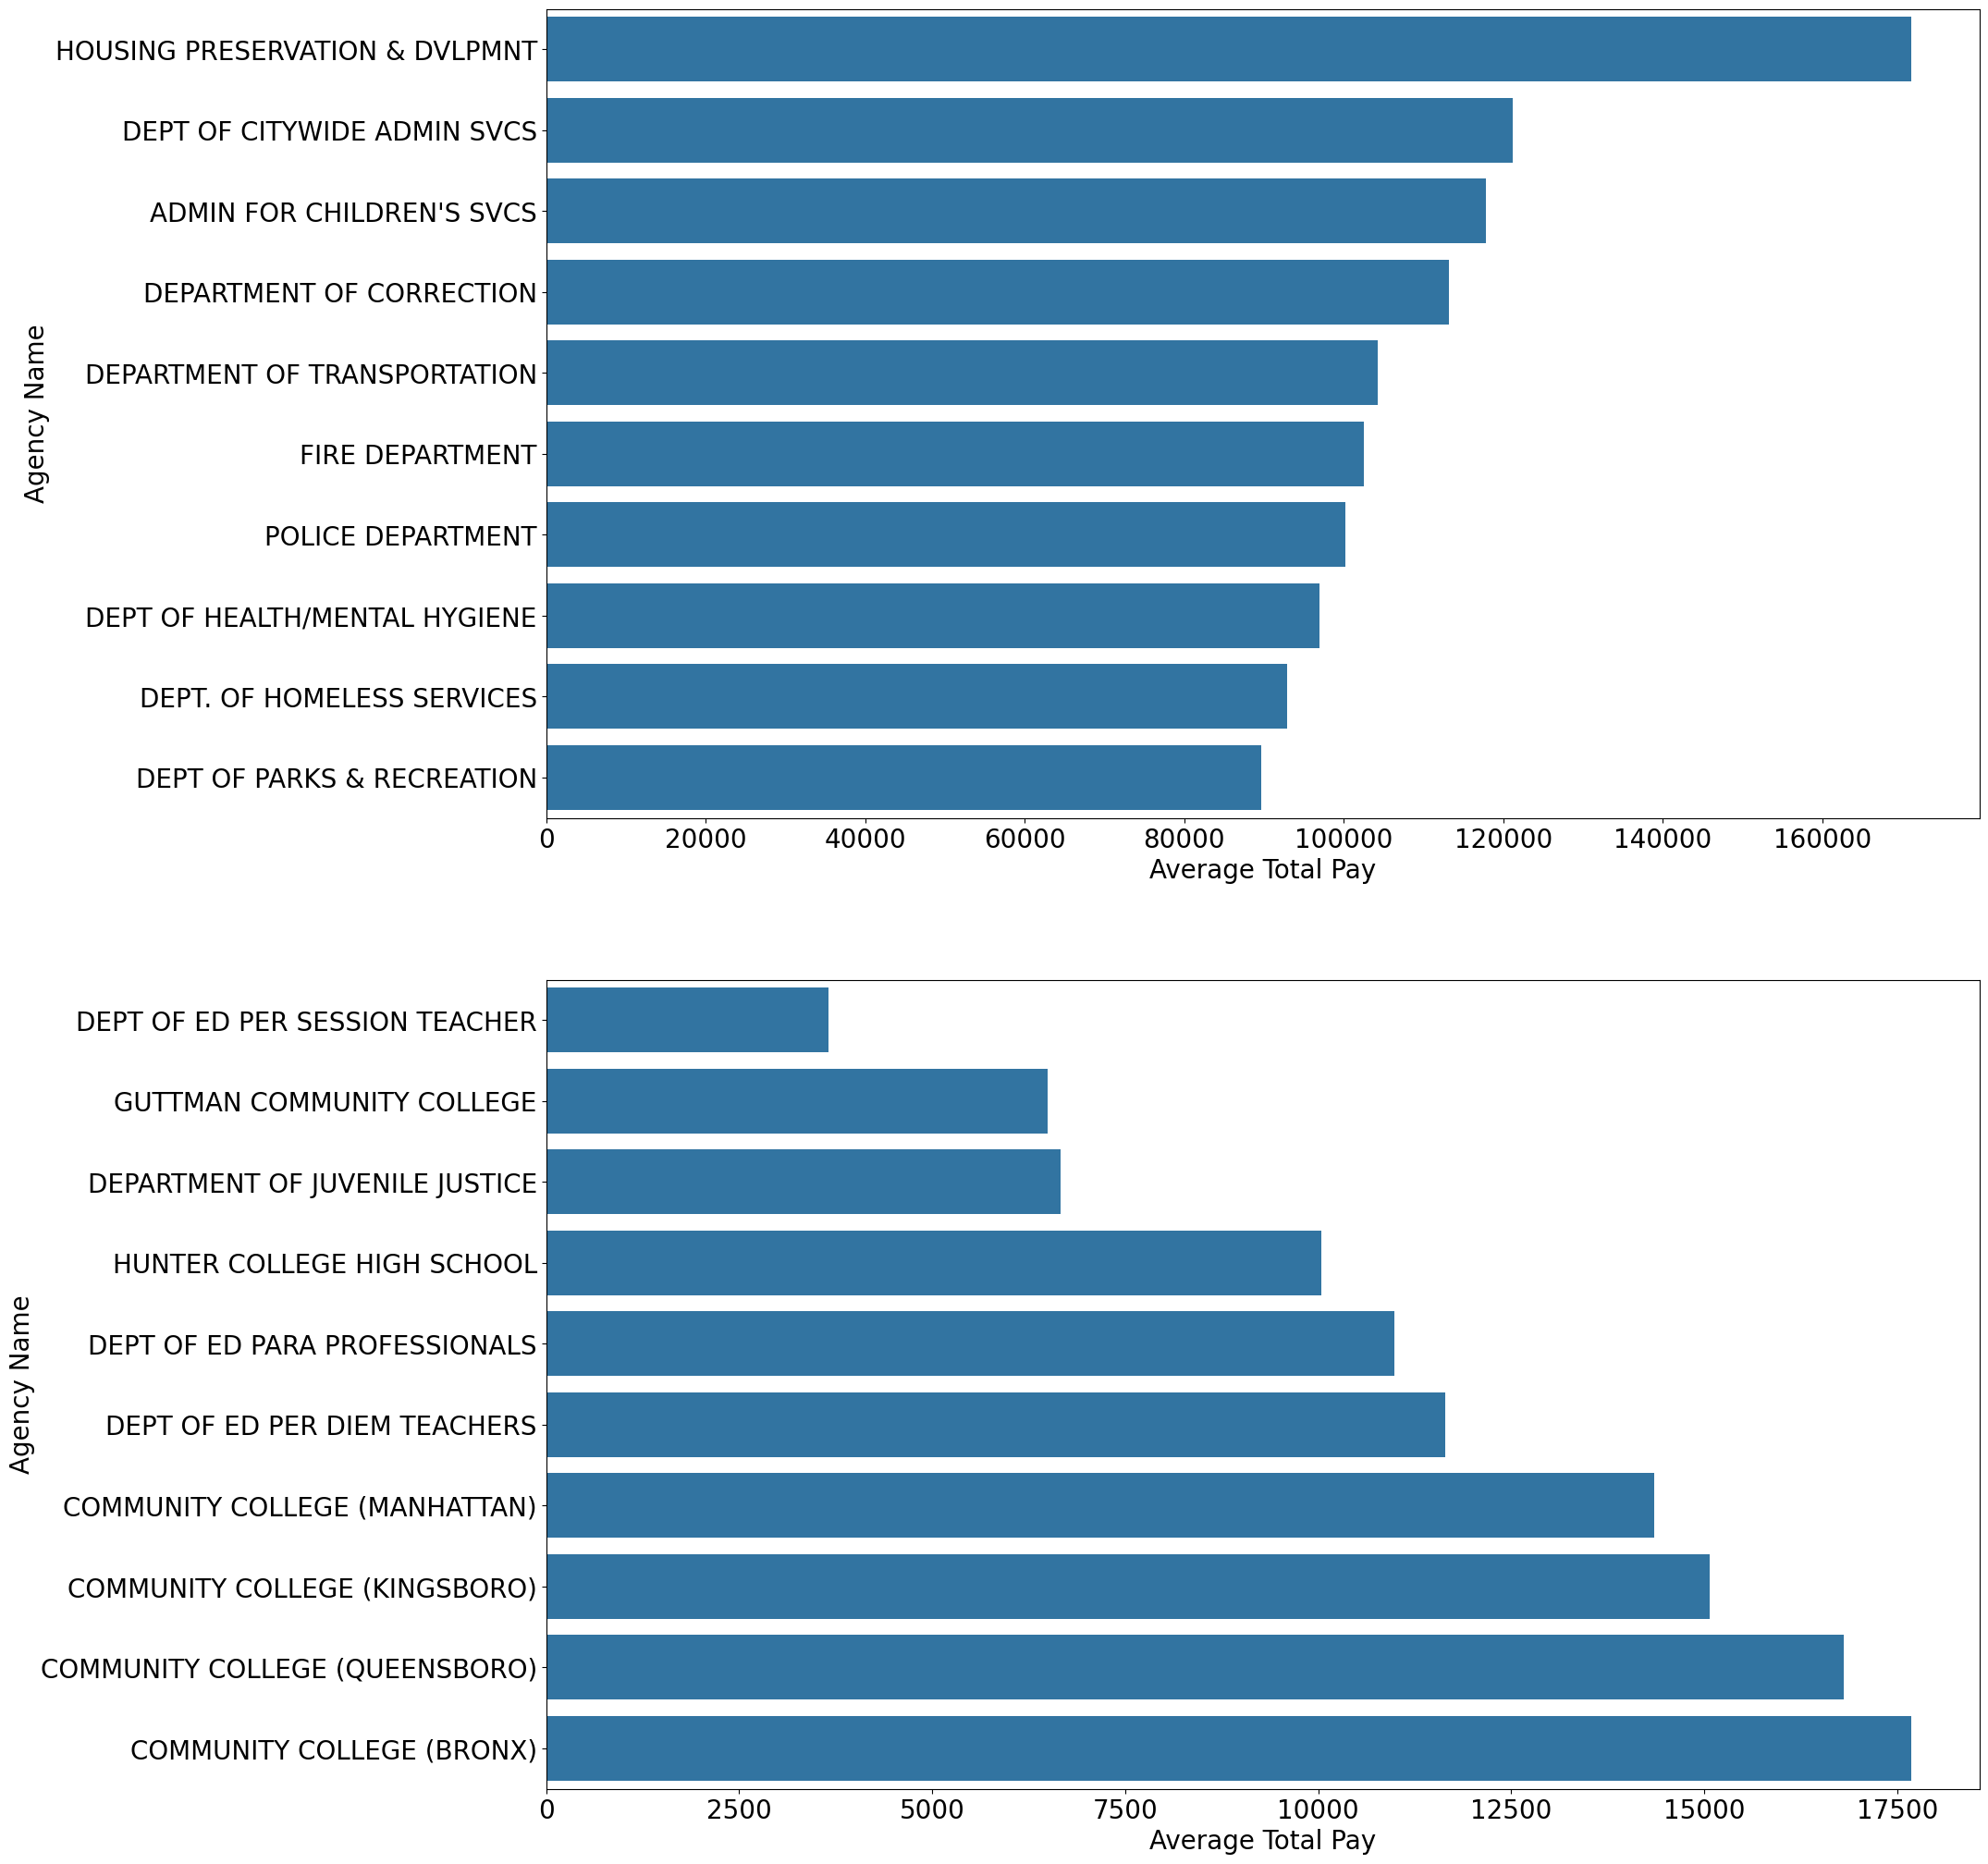

In [10]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Day')

#### Pay by Hour

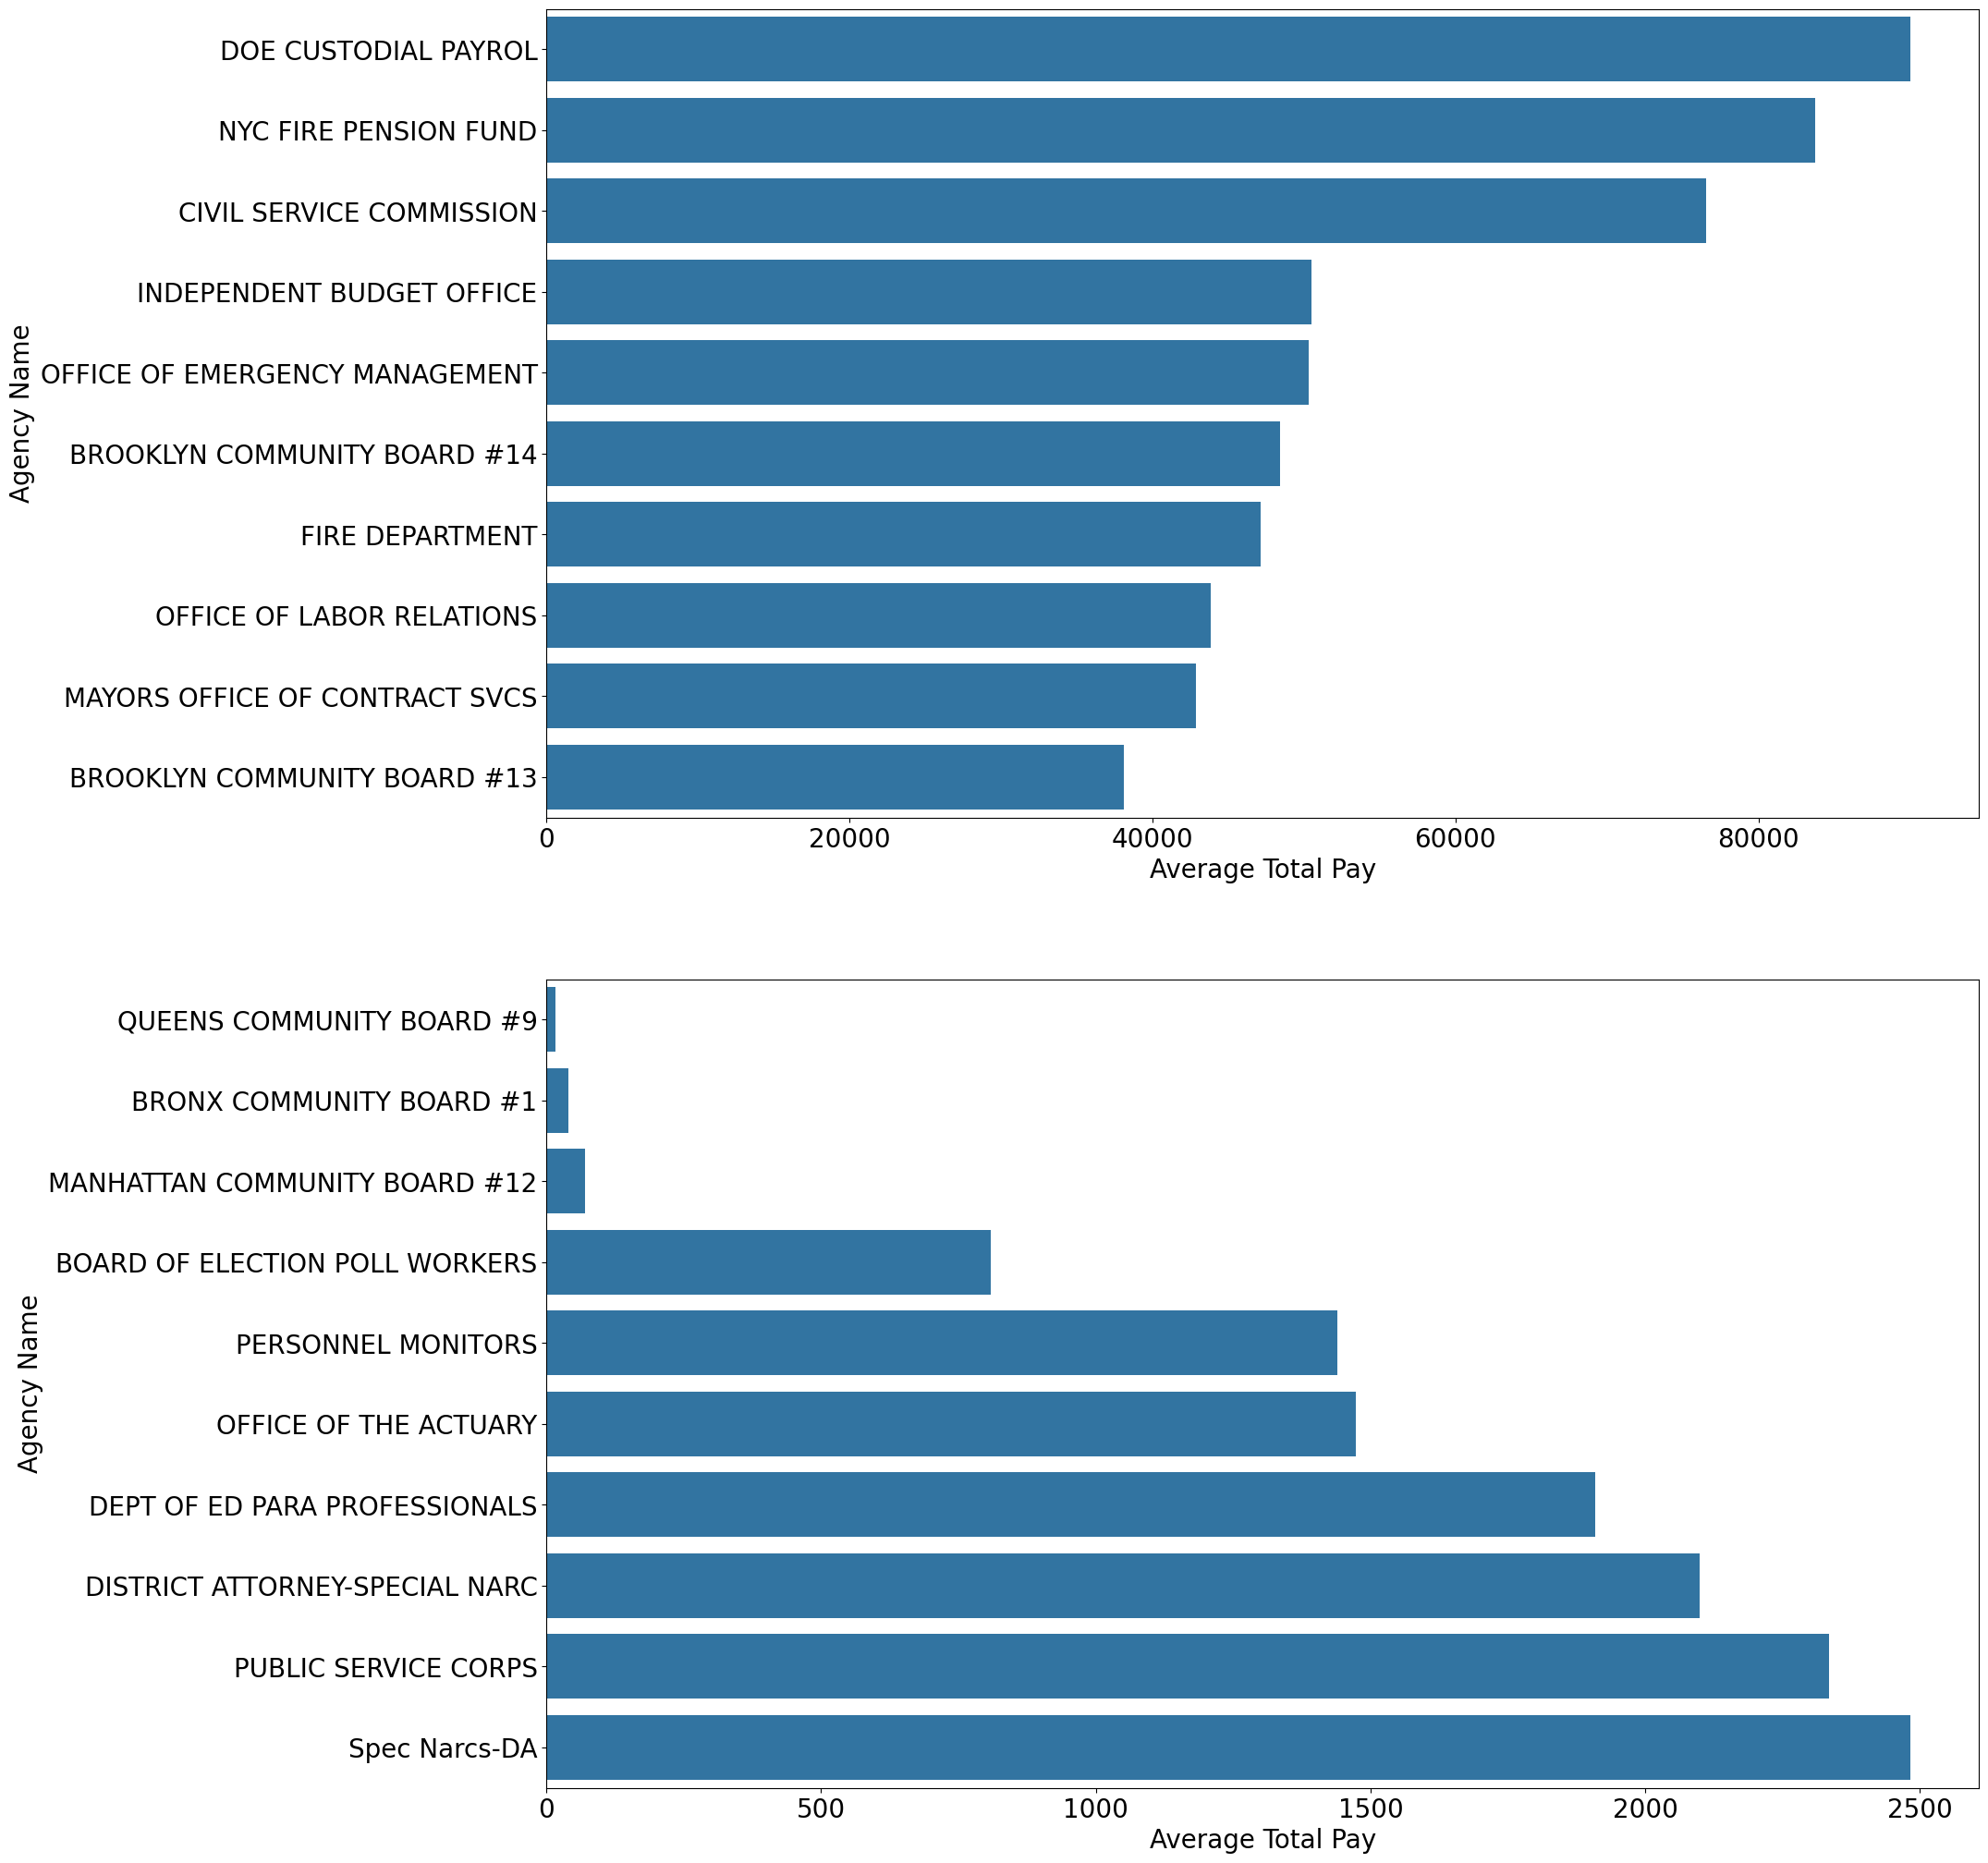

In [11]:
plot_high_low_pay(col='Agency Name', count=10, pay_basis='Hour')

<a id='title_high_low'></a>
# Jobs that pay the Most & Least money in NYC

#### By Annum

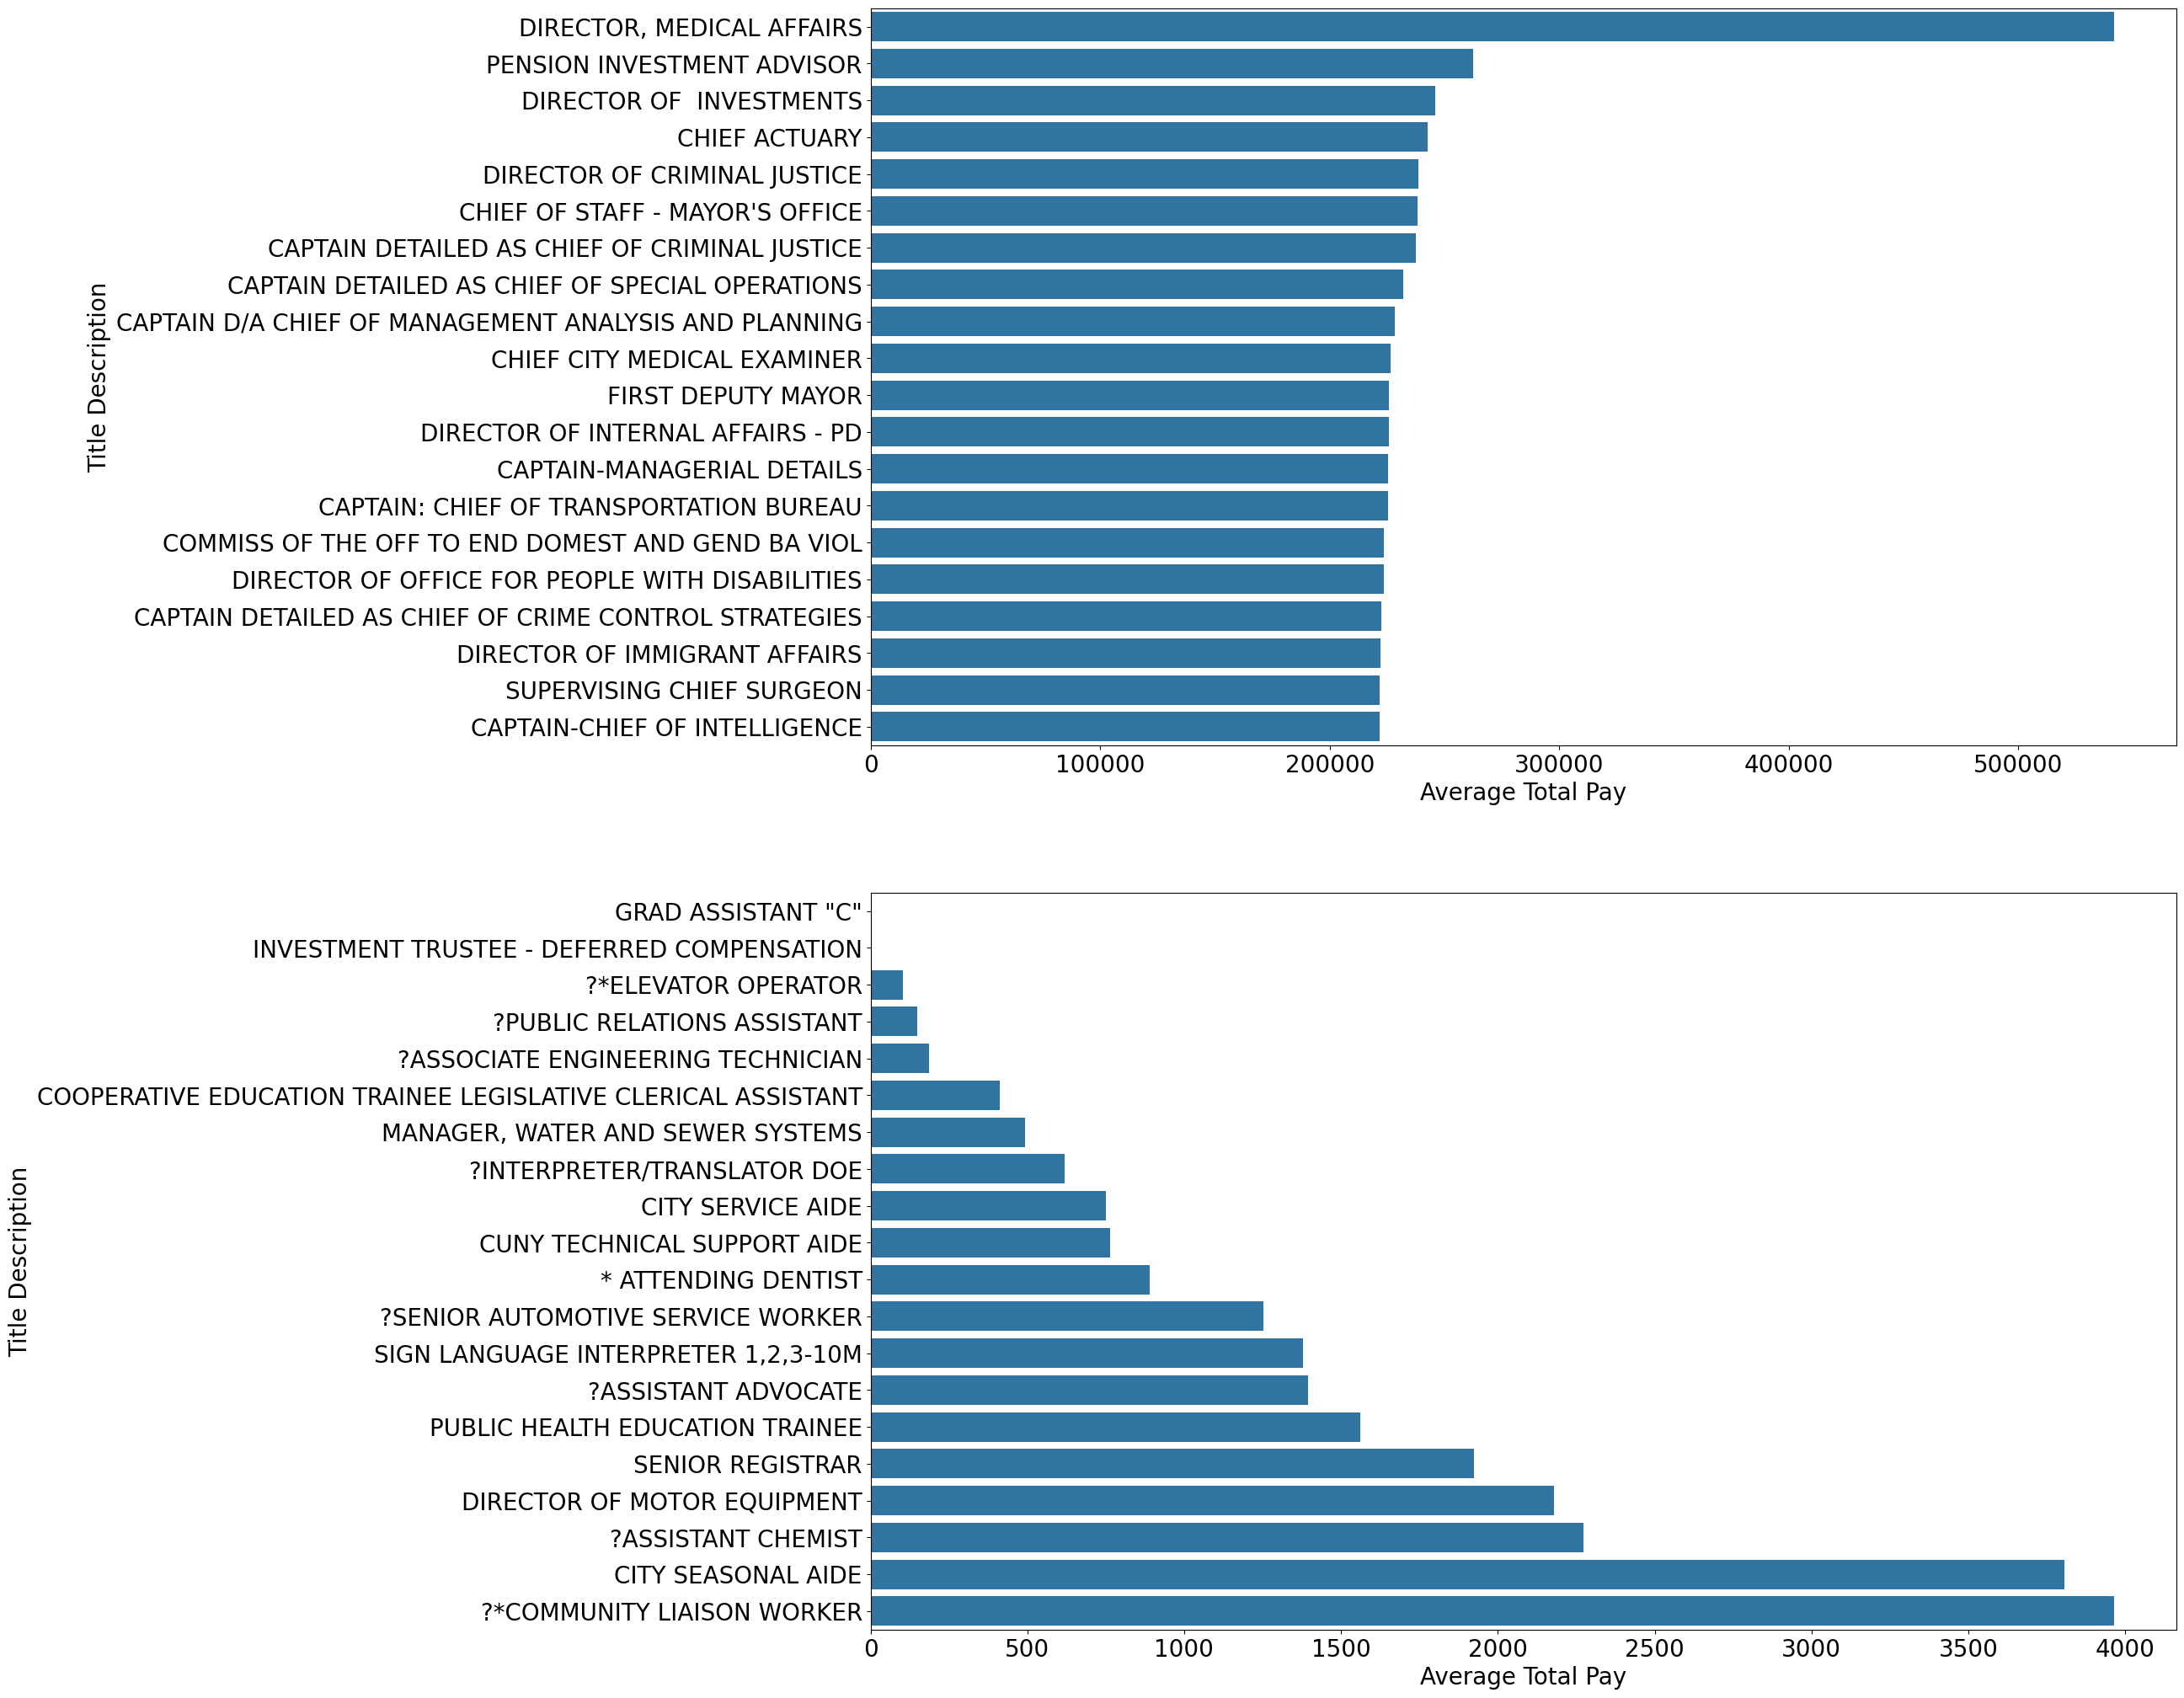

In [12]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Annum')

#### By Day

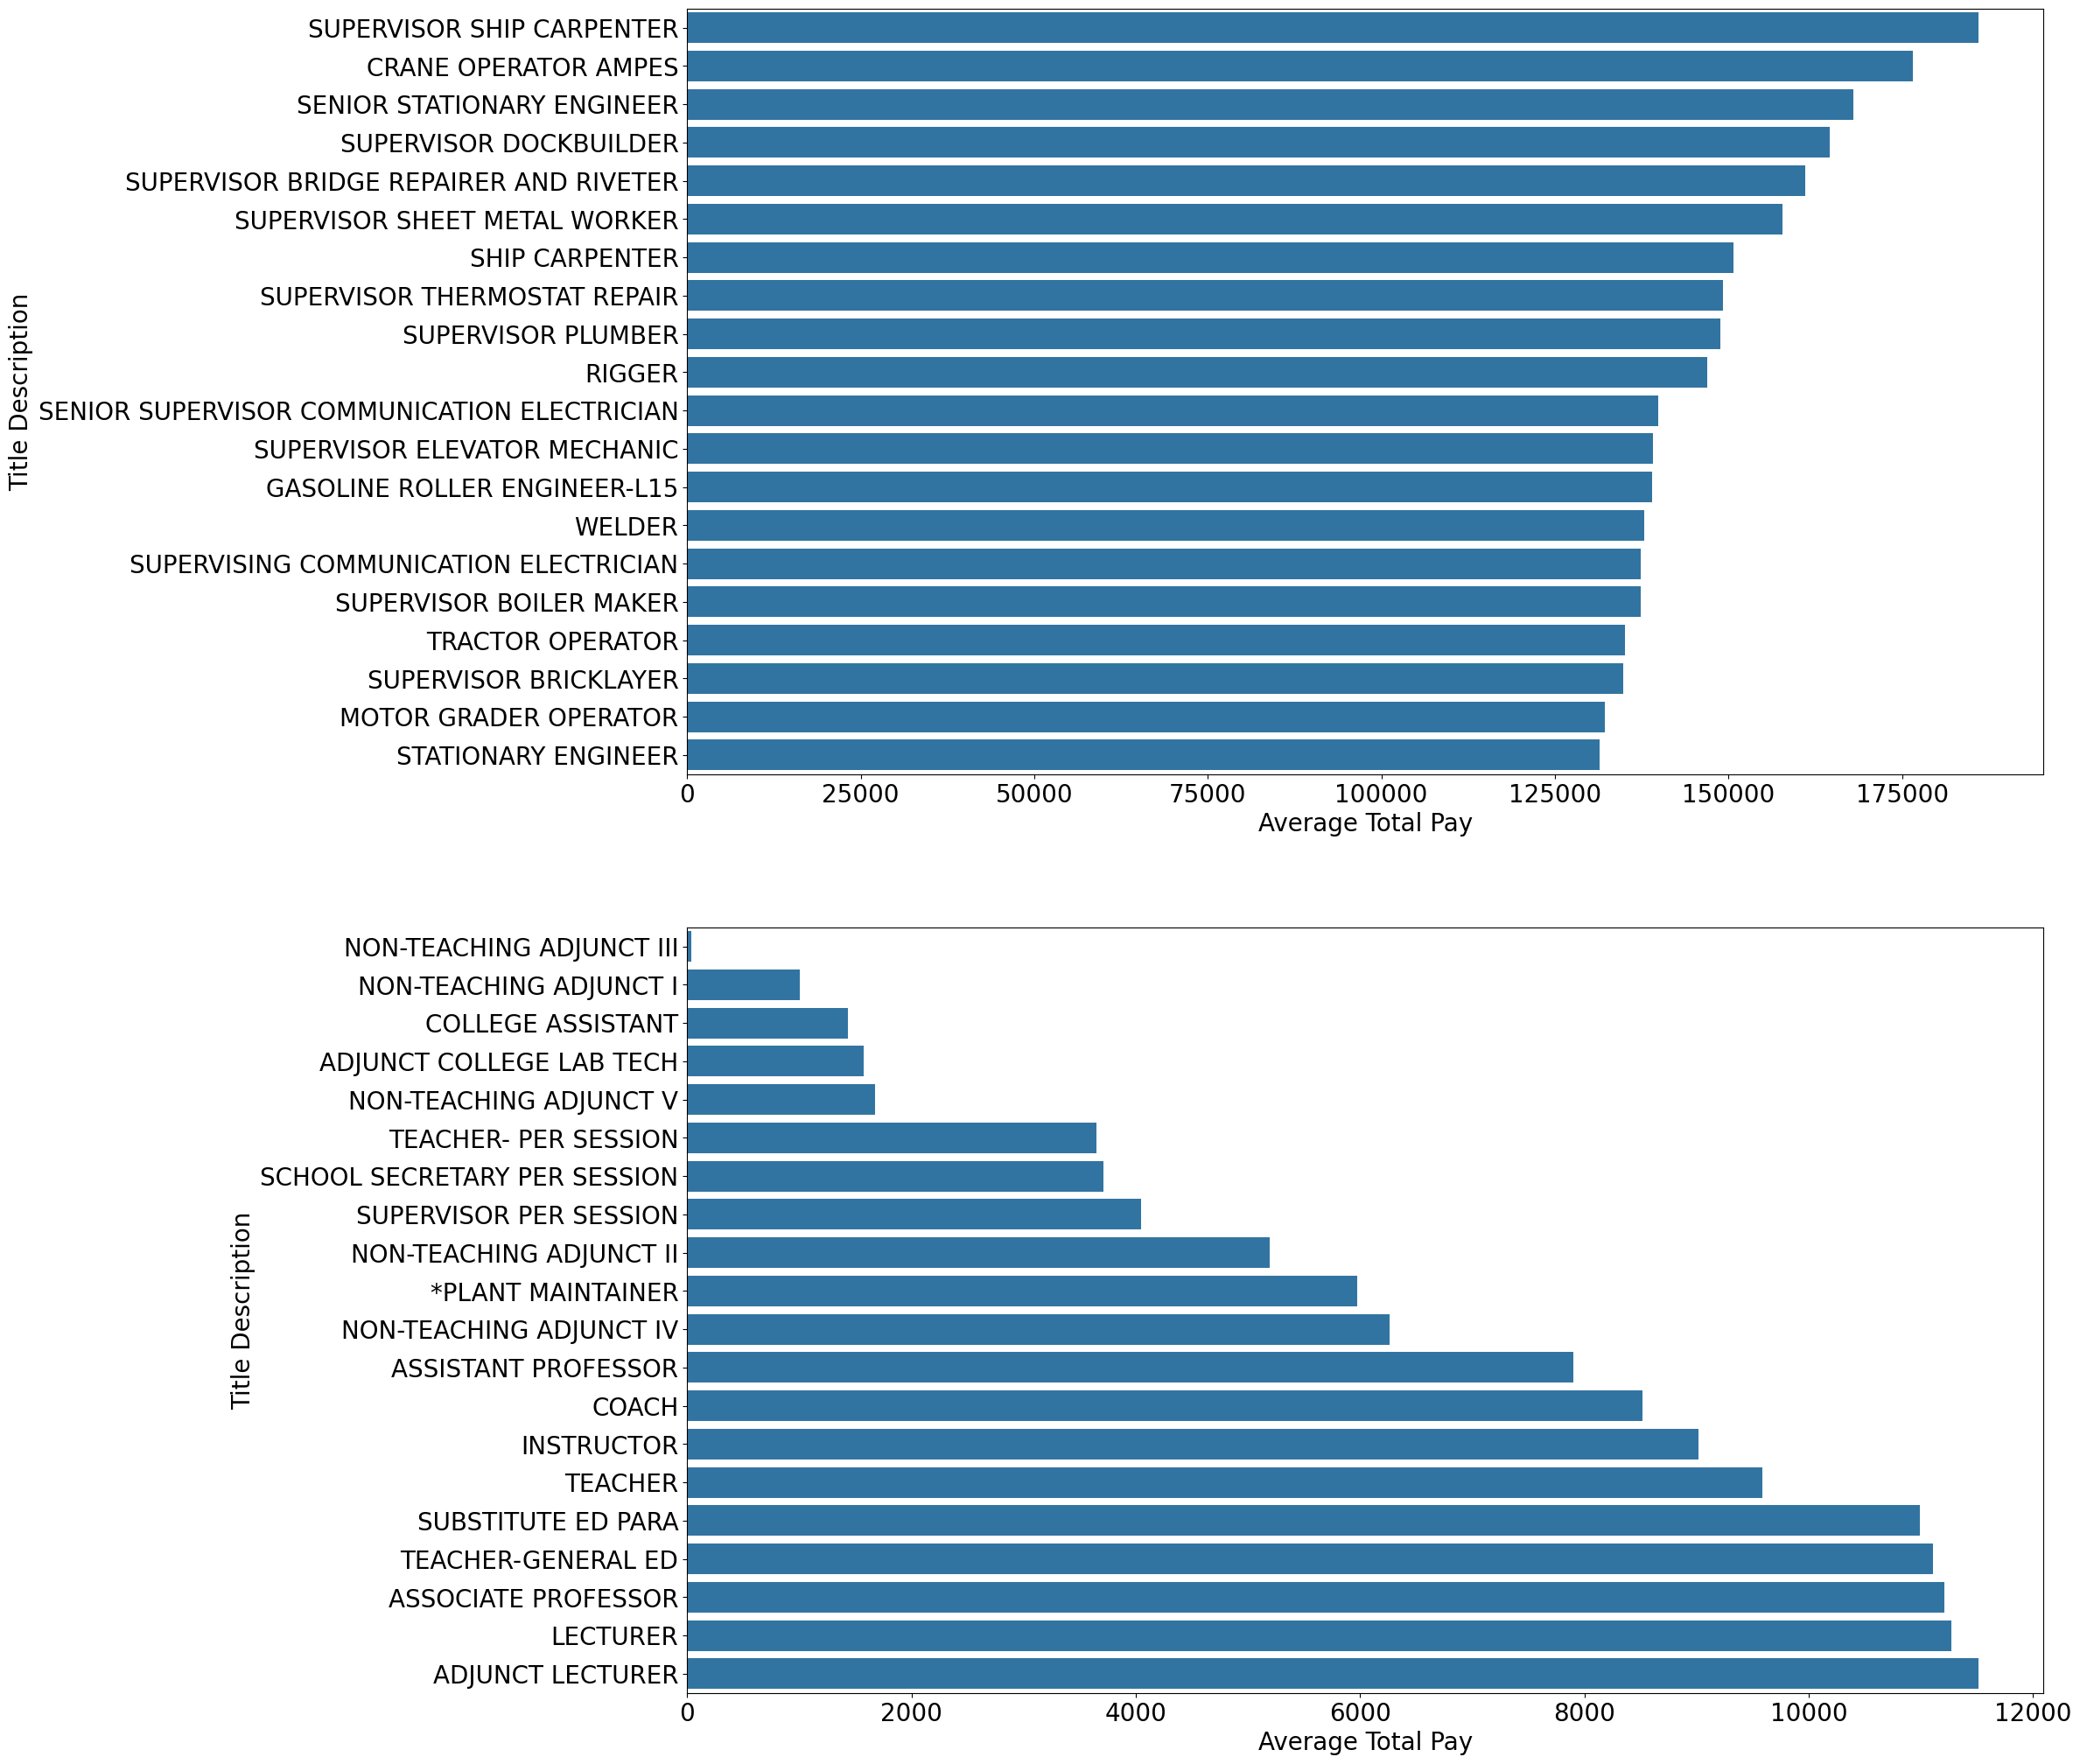

In [13]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Day')

#### By Hour

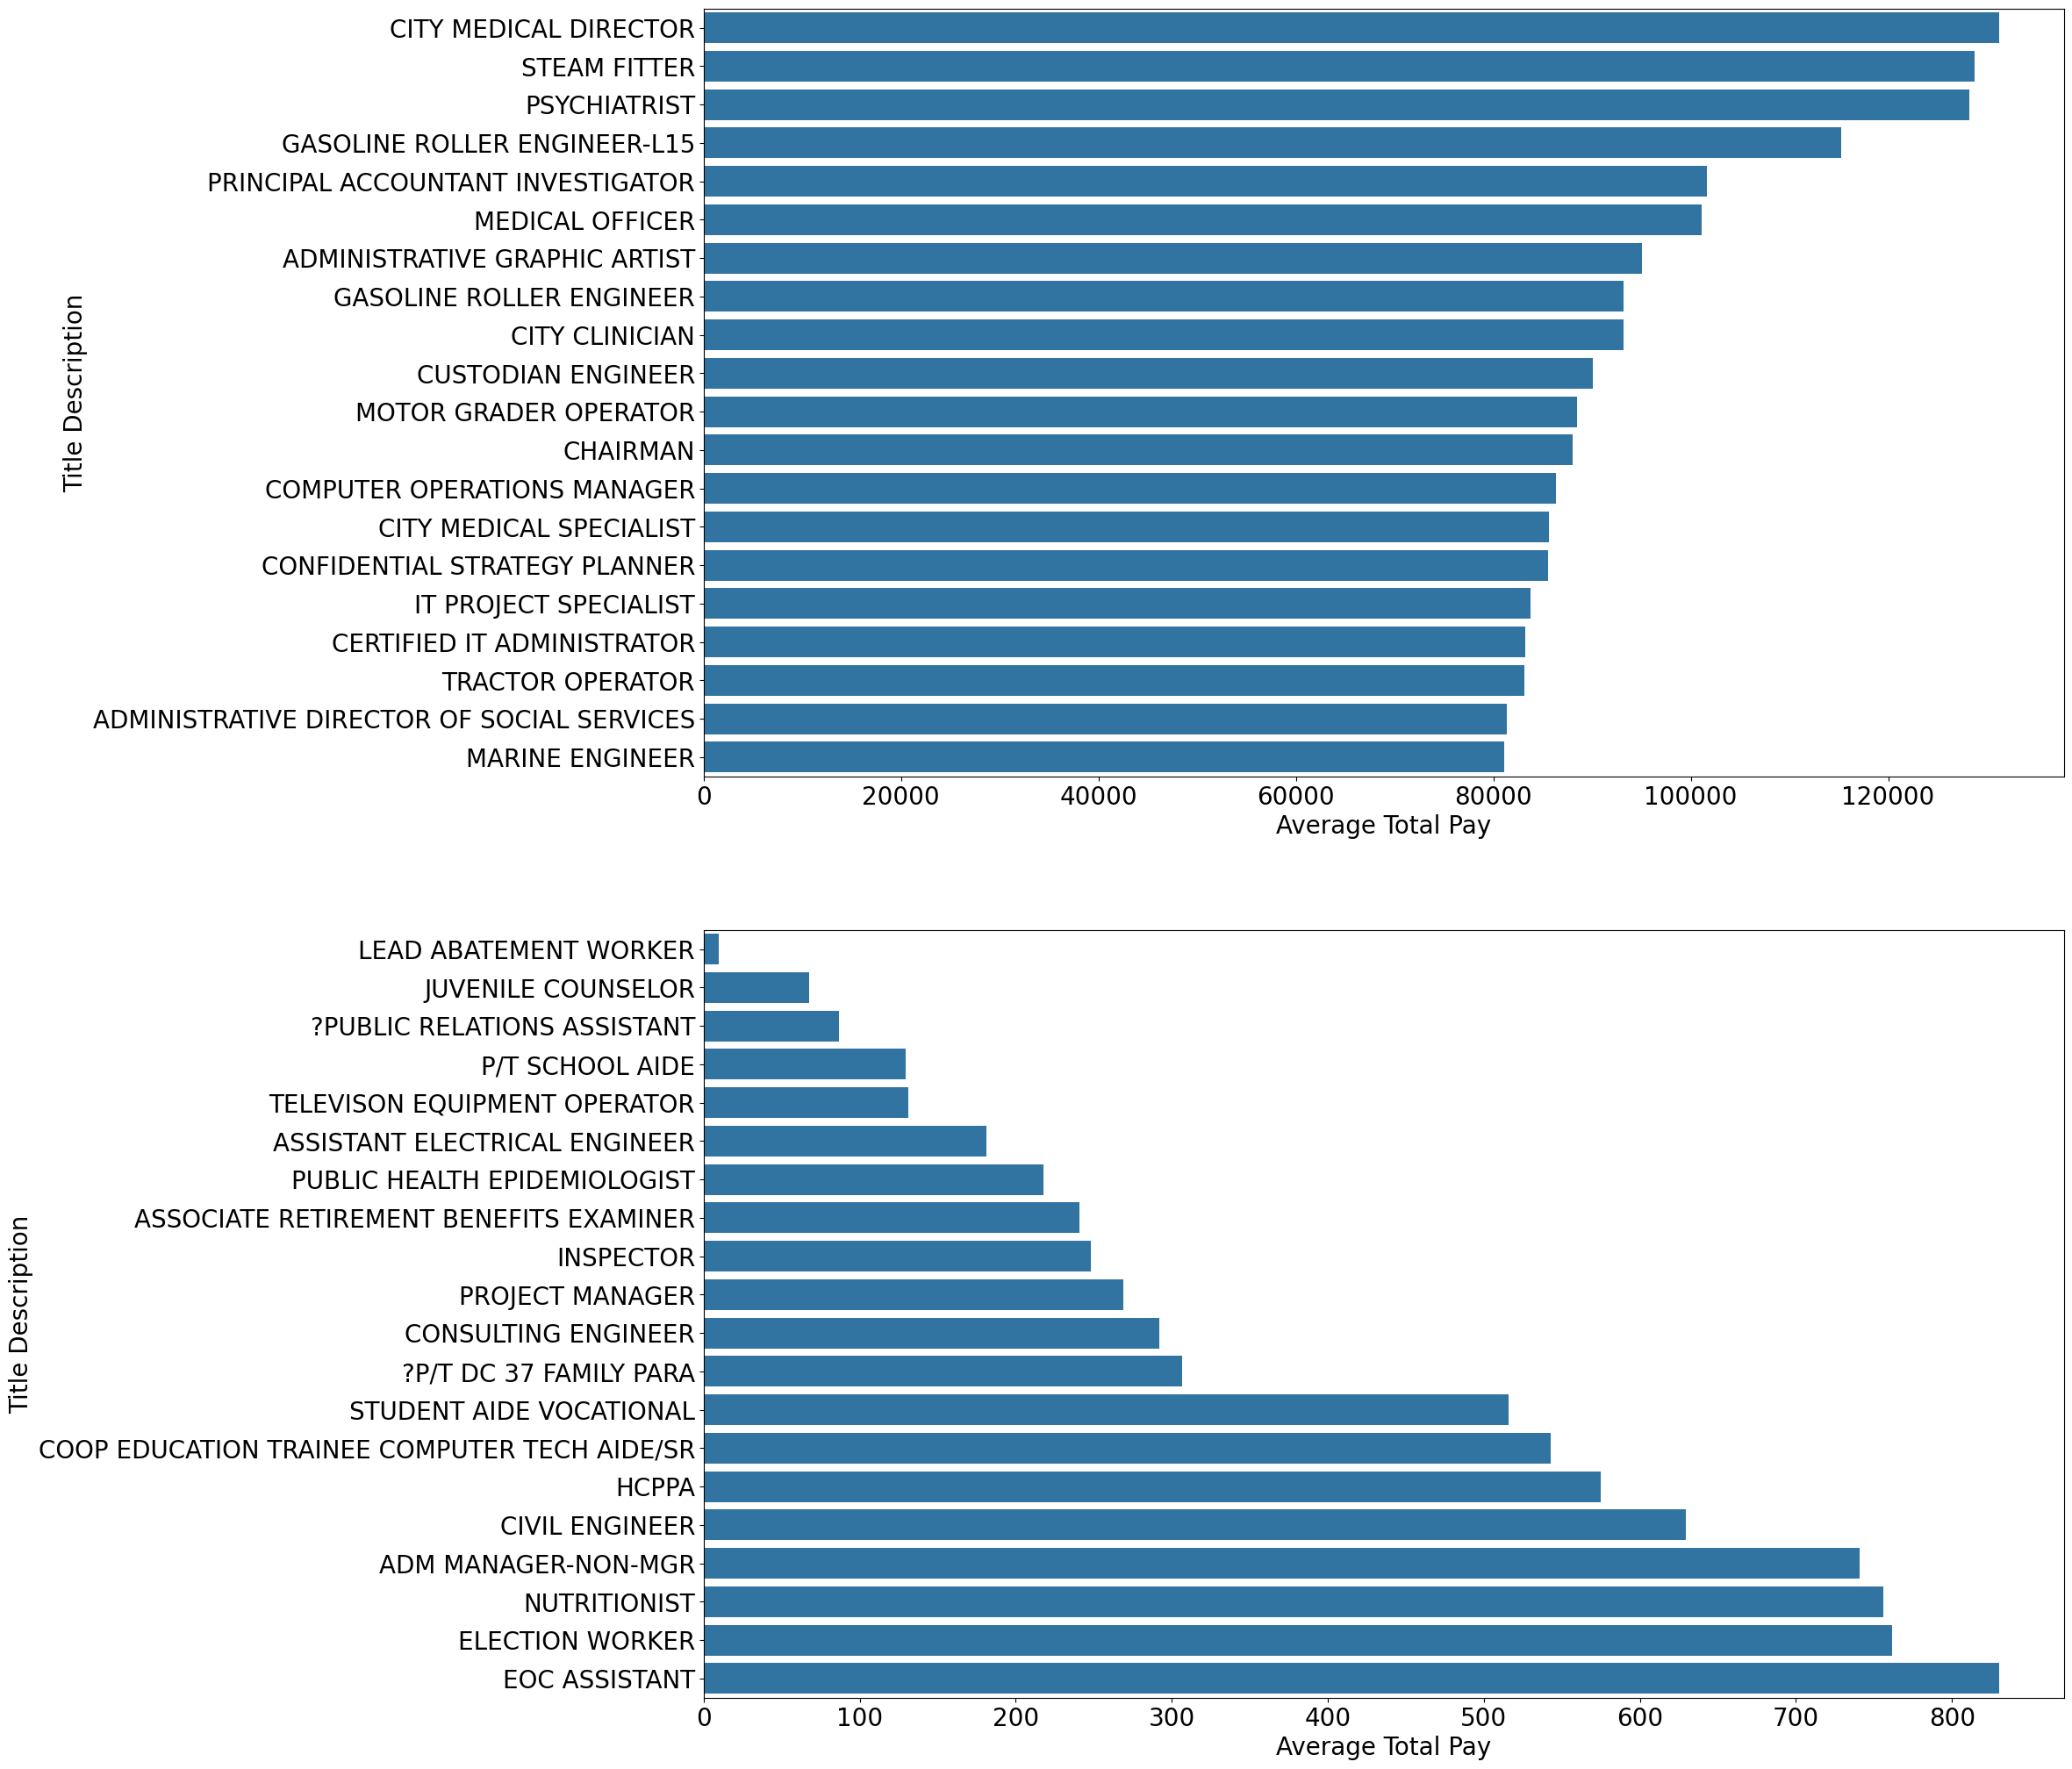

In [14]:
plot_high_low_pay(col='Title Description', count=20, pay_basis='Hour')

In [15]:
data['Work Location Borough'] = data['Work Location Borough'].str.strip().str.upper()
location_pay = data.groupby('Work Location Borough')['Total Pay'].mean().reset_index().sort_values('Total Pay',ascending=False)

<a id='loc_pay'></a>
# Average pay by Location

**`Work Location Borough`** tells us the area that a particular agency in NYC belongs to so it is interesting to know which one of these areas have the highest pay!

/tmp/ipykernel_11468/2100602610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Work Location Borough'], y=data['Total Pay'],


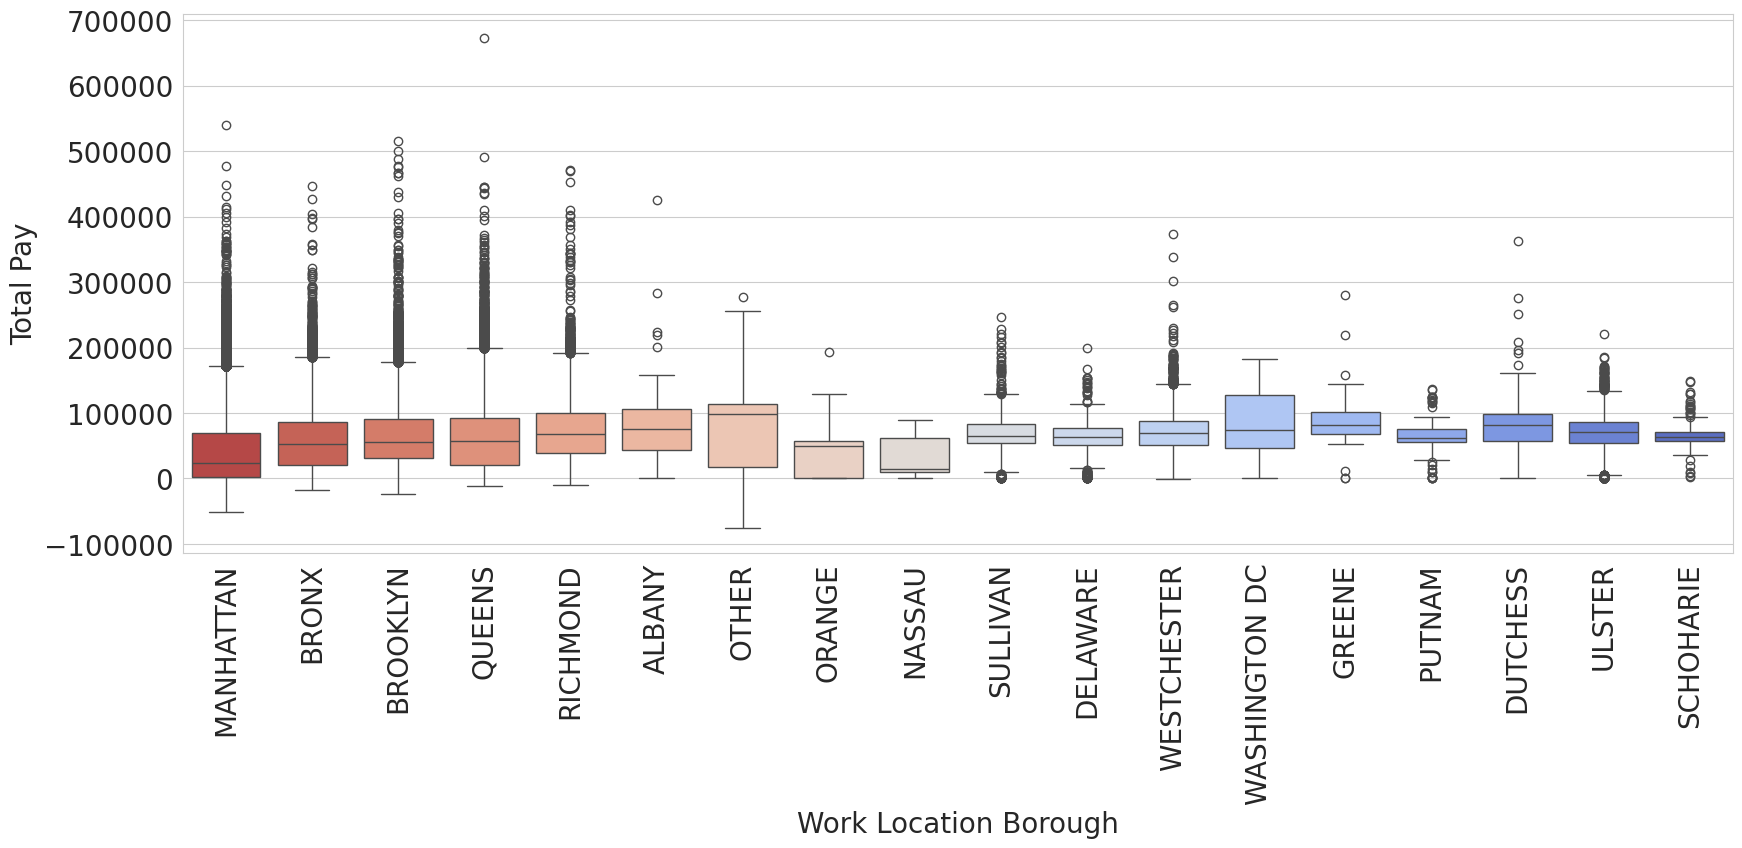

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,7))
sns.boxplot(x=data['Work Location Borough'], y=data['Total Pay'],
           data=location_pay, palette="coolwarm_r")
plt.xticks(rotation=90)
plt.show()

<a id='overtime'></a>
# Overtime Compensations

1. Which agencies are making their employees work over time & by how much?
2. What is the average OverTime pay in these agencies?

In [17]:
data['Agency Name'] = data['Agency Name'].str.strip().str.upper()
ot_ = data.groupby('Agency Name')['OT Hours'].mean().reset_index().sort_values('OT Hours',ascending=False)
ot_ = ot_.head(10)
ot_pay = data.groupby('Agency Name')['Total OT Paid'].mean().reset_index().sort_values('Total OT Paid',ascending=False)
ot_pay = ot_pay.head(10)

/tmp/ipykernel_11468/1768027037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ot_['Agency Name'], x=ot_['OT Hours'],
/tmp/ipykernel_11468/1768027037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ot_pay['Agency Name'], y=ot_pay['Total OT Paid'],


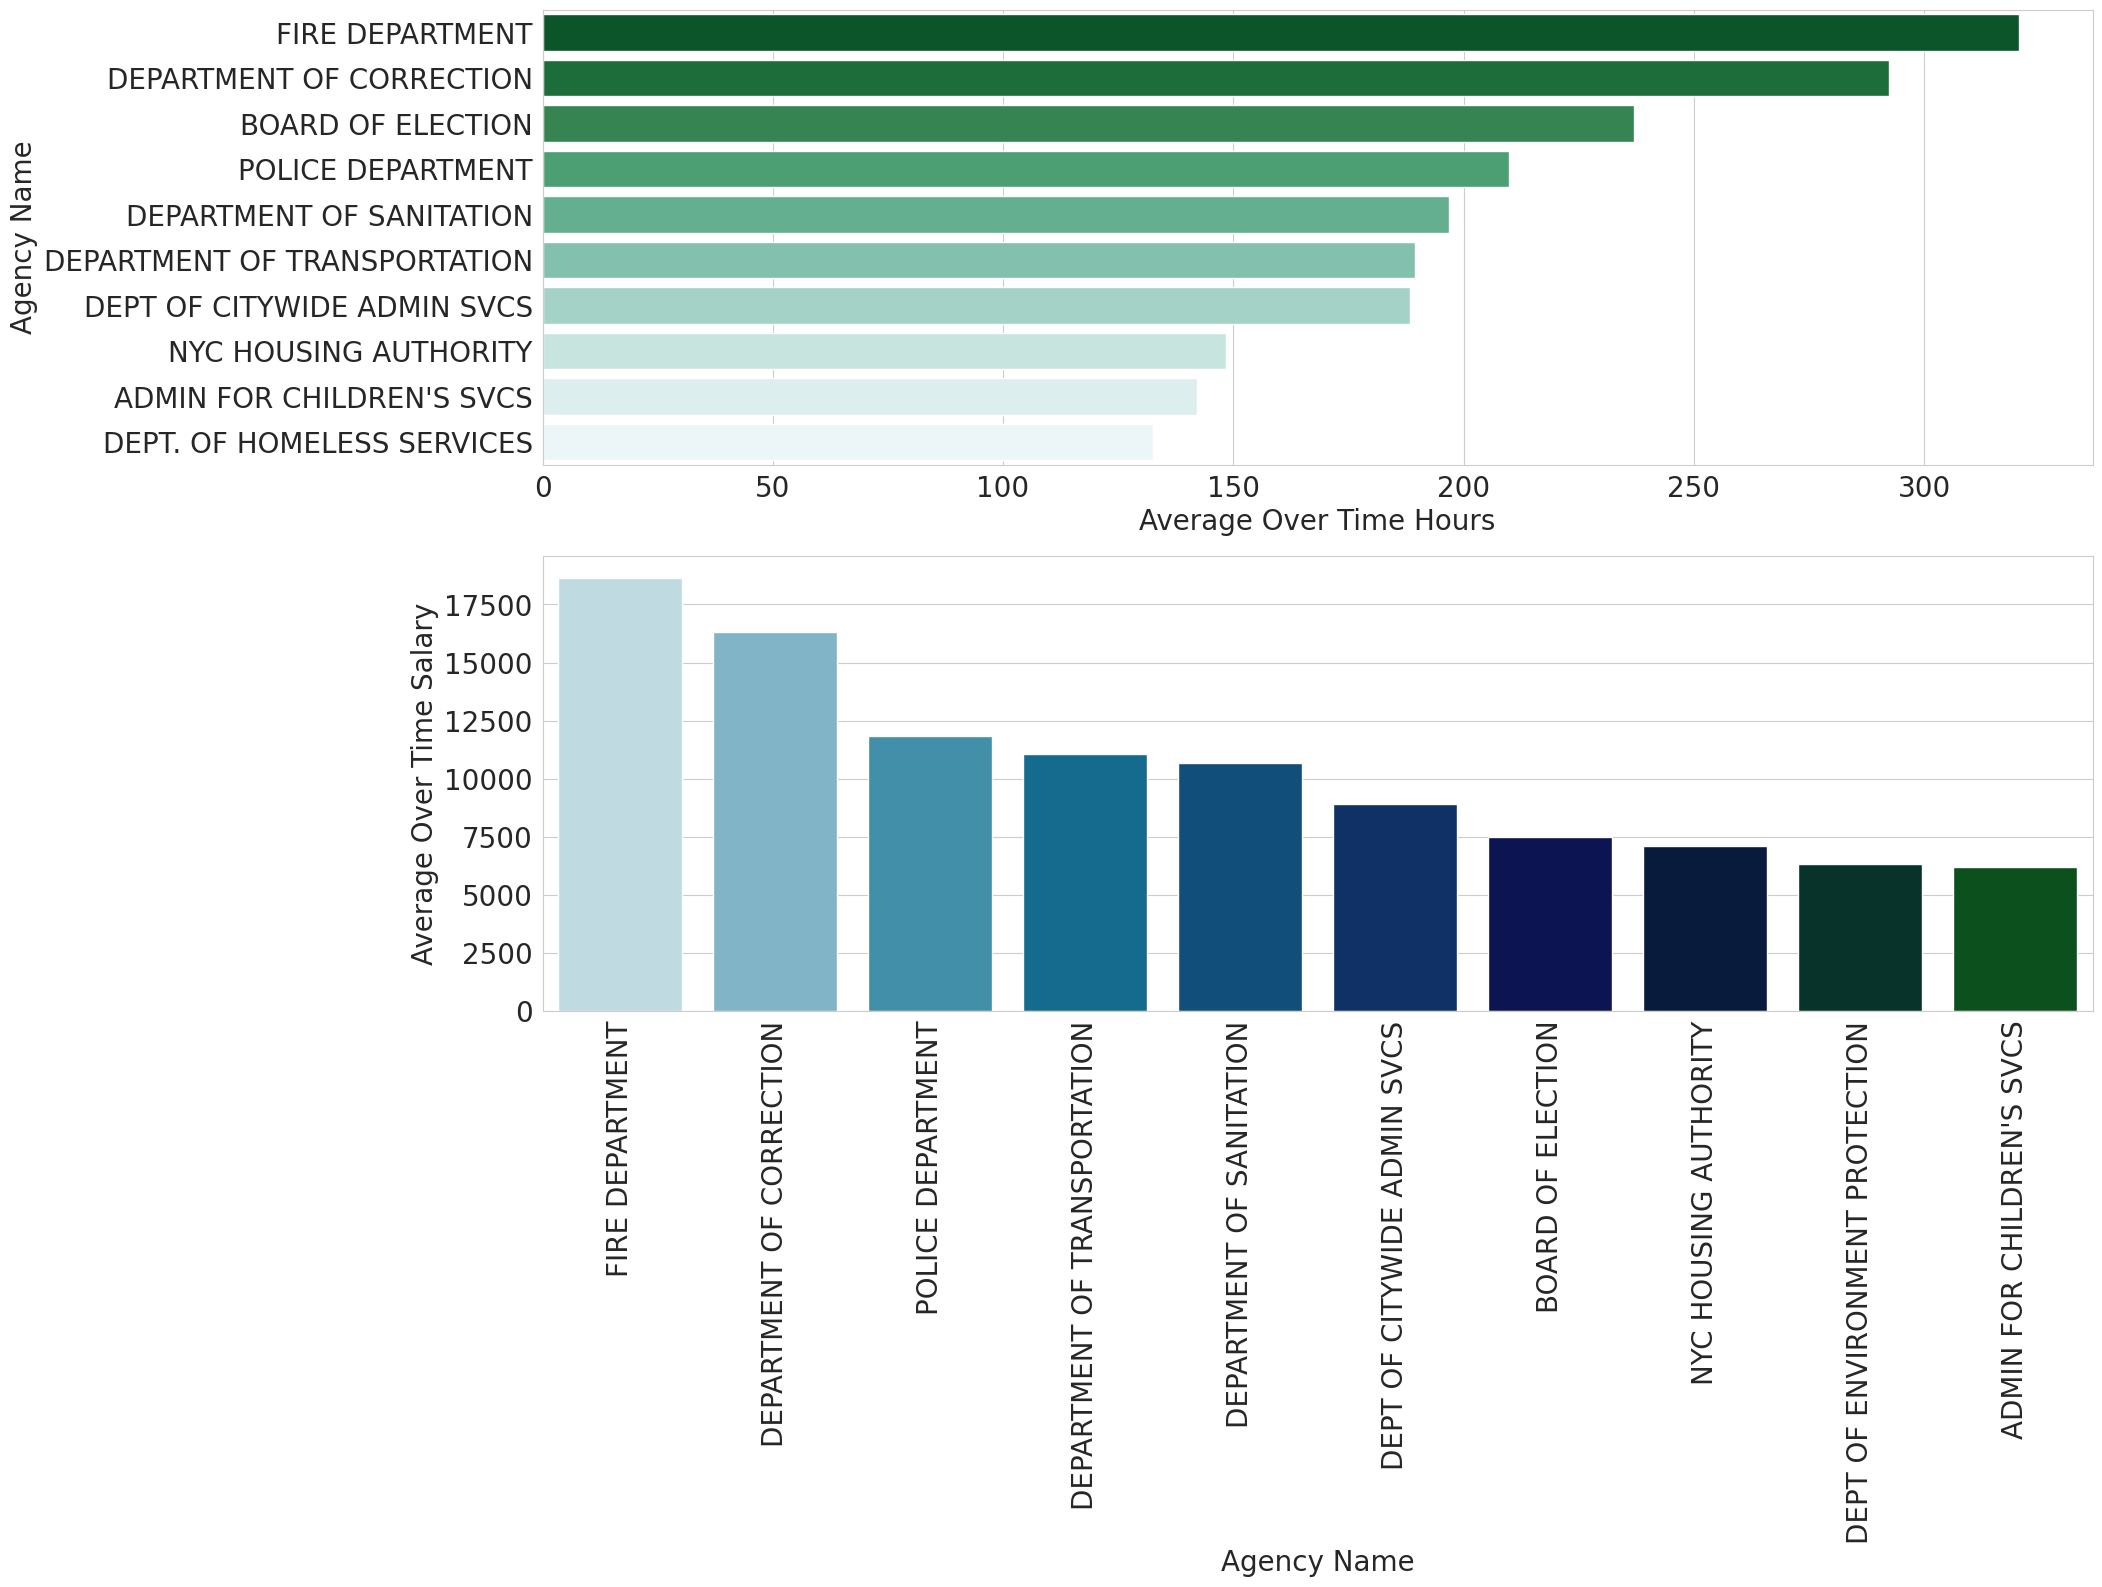

In [18]:
#sns.set_style("whitegrid")
f, ax = plt.subplots(2,1, figsize=(20,13))
sns.barplot(y=ot_['Agency Name'], x=ot_['OT Hours'],
           data=ot_, palette="BuGn_r", orient='h',ax=ax[0])
sns.barplot(x=ot_pay['Agency Name'], y=ot_pay['Total OT Paid'],
           data=ot_pay, palette="ocean_r", ax=ax[1])
ax[0].set_xlabel("Average Over Time Hours")
ax[1].set_ylabel("Average Over Time Salary")
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
plt.show()

**Fire Dept & Dept of correction** occupy the top 2 spots in the highest number of average overtime hours.